In [43]:
import pandas as pd
import geopandas as gpd
import numpy as np
from geopandas.tools import sjoin
import folium
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.cluster import KMeans

In [2]:
from folium.plugins import MarkerCluster
from folium import IFrame
import shapely
from shapely.geometry import Point
import unicodedata
import pysal as ps
import esda as esda
import mapclassify

/usr/local/lib/python3.6/dist-packages/pandana/network.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/lib/python3/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
   

In [3]:
url='https://opendata.arcgis.com/datasets/c7ccadc7024c4df58f9dfdc07c9acab5_0.geojson'
district=gpd.read_file(url)

In [4]:
district.head()

FID    LAD19CD               LAD19NM LAD19NMW   BNG_E   BNG_N     LONG  \
0    1  E06000001            Hartlepool           447157  531476 -1.27023   
1    2  E06000002         Middlesbrough           451141  516887 -1.21099   
2    3  E06000003  Redcar and Cleveland           464359  519597 -1.00611   
3    4  E06000004      Stockton-on-Tees           444937  518183 -1.30669   
4    5  E06000005            Darlington           428029  515648 -1.56835   

       LAT   Shape__Area  Shape__Length  \
0  54.6762  2.881478e+08   87219.641836   
1  54.5447  1.638873e+08   61148.819845   
2  54.5675  7.373651e+08  136334.504906   
3  54.5569  6.095007e+08  150910.462698   
4  54.5353  5.901079e+08  158350.769111   

                                            geometry  
0  POLYGON ((-1.17763 54.69919, -1.24284 54.72226...  
1  POLYGON ((-1.28263 54.56528, -1.27061 54.55602...  
2  POLYGON ((-1.14913 54.61433, -1.16025 54.60454...  
3  POLYGON ((-1.28263 54.56528, -1.26256 54.57029...  
4  POLYGON ((-1.69693 54.53601, -1.65794 54.53459...

In [5]:
ev_by_district=pd.read_csv('ev_by_district.csv')

In [6]:
ev_by_district.head()

ONS code Local Authority  Total public charging devices  \
0  E06000047   County Durham                             92   
1  E06000005      Darlington                             27   
2  E06000001      Hartlepool                              5   
3  E06000002   Middlesbrough                             25   
4  E06000057  Northumberland                            139   

   Total public rapid charging devices  \
0                                   13   
1                                    2   
2                                    0   
3                                    4   
4                                   24   

   Charging devices per 100,000 population  
0                                       17  
1                                       25  
2                                        5  
3                                       18  
4                                       43

In [7]:
evs_by_district=pd.DataFrame.merge(district,ev_by_district,left_on='LAD19CD',right_on='ONS code')

In [8]:
plugin=pd.read_csv('veh0131.csv')

In [9]:
plugin.head()

ONS LA ode Region/Loal Authority  2019 Q3  2019 Q2  2019 Q1  2018 Q4  \
0  K03000001         Great Britain   227870   208666   197208   183901   
1  E92000001               England   204879   187839   177772   166254   
2  E12000001            North East     3917     3613     3448     3384   
3  E06000047       ounty Durham UA      745      713      673      671   
4  E06000005         Darlington UA      211      182      178      167   

   2018 Q3  2018 Q2   2018 Q1  2017 Q4  ...  2014 Q1  2013 Q4  2013 Q3  \
0   169820   155524  142993.0   130244  ...  13418.0  11697.0  10752.0   
1   153119   140642  128985.0   118115  ...  11924.0  10417.0   9570.0   
2     3198     3056    2942.0     2817  ...    413.0    343.0    321.0   
3      631      614     583.0      575  ...     69.0     58.0     53.0   
4      169      158     145.0      144  ...     13.0     13.0     13.0   

   2013 Q2  2013 Q1  2012 Q4  2012 Q3  2012 Q2  2012 Q1  2011 Q4  
0   9987.0   9111.0   8522.0   7770.0   7166.0   6534.0   6201.0  
1   8841.0   8127.0   7536.0   6990.0   6417.0   5906.0   5700.0  
2    290.0    256.0    235.0    226.0    202.0    182.0    189.0  
3     39.0     30.0     27.0     26.0     22.0     20.0     39.0  
4     10.0      9.0      5.0      5.0      5.0      NaN      NaN  

[5 rows x 34 columns]

In [10]:
plugin_evs_by_district=pd.DataFrame.merge(evs_by_district,plugin,left_on='ONS code',right_on='ONS LA ode')

In [11]:
type(plugin_evs_by_district)

geopandas.geodataframe.GeoDataFrame

In [12]:
plugin_evs_by_district['ev_charger/vehicle_ratio']=plugin_evs_by_district['Total public rapid charging devices']/plugin_evs_by_district['2019 Q3']

In [13]:
plugin_evs_by_district['ev_charger/vehicle_ratio'].describe()

count    375.000000
mean       0.017390
std        0.023016
min        0.000000
25%        0.004988
50%        0.011142
75%        0.021277
max        0.225000
Name: ev_charger/vehicle_ratio, dtype: float64

In [14]:
type(plugin_evs_by_district)

geopandas.geodataframe.GeoDataFrame

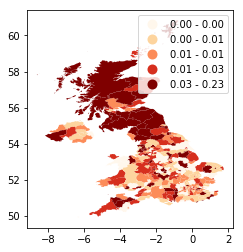

In [15]:
plugin_evs_by_district.plot(column='ev_charger/vehicle_ratio', cmap='OrRd', scheme='quantiles', legend=True)

In [16]:
plugin_evs_by_district.head()

FID    LAD19CD               LAD19NM LAD19NMW   BNG_E   BNG_N     LONG  \
0    1  E06000001            Hartlepool           447157  531476 -1.27023   
1    2  E06000002         Middlesbrough           451141  516887 -1.21099   
2    3  E06000003  Redcar and Cleveland           464359  519597 -1.00611   
3    4  E06000004      Stockton-on-Tees           444937  518183 -1.30669   
4    5  E06000005            Darlington           428029  515648 -1.56835   

       LAT   Shape__Area  Shape__Length  ... 2013 Q4 2013 Q3 2013 Q2  2013 Q1  \
0  54.6762  2.881478e+08   87219.641836  ...     NaN     NaN     NaN      NaN   
1  54.5447  1.638873e+08   61148.819845  ...     9.0    10.0    10.0      NaN   
2  54.5675  7.373651e+08  136334.504906  ...     NaN     NaN     NaN      NaN   
3  54.5569  6.095007e+08  150910.462698  ...    32.0    31.0    29.0     29.0   
4  54.5353  5.901079e+08  158350.769111  ...    13.0    13.0    10.0      9.0   

   2012 Q4  2012 Q3 2012 Q2 2012 Q1  2011 Q4  ev_charger/vehicle_ratio  
0      NaN      NaN     NaN     NaN      NaN                  0.000000  
1      NaN      NaN     NaN     NaN      NaN                  0.048780  
2      NaN      NaN     NaN     0.0      0.0                  0.009009  
3     30.0     30.0    29.0    27.0     26.0                  0.040000  
4      5.0      5.0     5.0     NaN      NaN                  0.009479  

[5 rows x 51 columns]

In [17]:
plugin_evs_by_district.describe()

FID          BNG_E         BNG_N        LONG         LAT  \
count  375.000000     375.000000  3.750000e+02  375.000000  375.000000   
mean   190.885333  427334.909333  3.133467e+05   -1.626904   52.704904   
std    110.206297  113717.876449  1.779220e+05    1.695940    1.598072   
min      1.000000   41233.000000  1.144700e+04   -7.527100   49.923300   
25%     96.500000  353829.000000  1.811145e+05   -2.703040   51.511050   
50%    190.000000  439538.000000  2.742710e+05   -1.401150   52.357900   
75%    286.500000  517718.500000  4.041545e+05   -0.304915   53.526400   
max    382.000000  646760.000000  1.180307e+06    1.649500   60.505000   

        Shape__Area  Shape__Length  Total public charging devices  \
count  3.750000e+02   3.750000e+02                     375.000000   
mean   1.862954e+09   2.309915e+05                      39.173333   
std    5.446038e+09   3.981662e+05                      52.096110   
min    6.913928e+06   1.109432e+04                       0.000000   
25%    2.435668e+08   8.441106e+04                      13.500000   
50%    7.373651e+08   1.512269e+05                      24.000000   
75%    1.690266e+09   2.535158e+05                      42.000000   
max    9.130606e+10   5.165548e+06                     485.000000   

       Total public rapid charging devices  \
count                           375.000000   
mean                              6.450667   
std                               8.061402   
min                               0.000000   
25%                               2.000000   
50%                               4.000000   
75%                               8.500000   
max                              88.000000   

       Charging devices per 100,000 population  ...     2013 Q4     2013 Q3  \
count                               375.000000  ...  339.000000  326.000000   
mean                                 22.952000  ...   32.445428   30.773006   
std                                  29.313406  ...   54.049444   52.990136   
min                                   0.000000  ...    5.000000    5.000000   
25%                                   9.000000  ...   10.000000   10.000000   
50%                                  17.000000  ...   16.000000   15.500000   
75%                                  25.000000  ...   30.000000   28.000000   
max                                 414.000000  ...  502.000000  491.000000   

          2013 Q2     2013 Q1     2012 Q4     2012 Q3     2012 Q2     2012 Q1  \
count  308.000000  298.000000  284.000000  269.000000  253.000000  240.000000   
mean    29.818182   28.114094   27.091549   26.263941   25.272727   24.150000   
std     51.935559   51.113530   50.524445   48.543882   51.156241   53.673061   
min      5.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      9.000000    8.000000    7.000000    7.000000    6.000000    6.000000   
50%     14.000000   12.000000   12.000000   11.000000   11.000000    9.000000   
75%     26.250000   25.000000   25.000000   24.000000   22.000000   23.250000   
max    504.000000  550.000000  575.000000  605.000000  665.000000  710.000000   

          2011 Q4  ev_charger/vehicle_ratio  
count  229.000000                375.000000  
mean    24.135371                  0.017390  
std     56.833429                  0.023016  
min      0.000000                  0.000000  
25%      6.000000                  0.004988  
50%     10.000000                  0.011142  
75%     24.000000                  0.021277  
max    757.000000                  0.225000  

[8 rows x 43 columns]

In [18]:
plugin_evs_by_district['ev_charger/vehicle_ratio']=plugin_evs_by_district['Total public rapid charging devices']/plugin_evs_by_district['2019 Q3']

In [19]:
plugin_evs_by_district[['ev_charger/vehicle_ratio','LAD19NM']].to_csv('quantile.csv')

In [20]:
plugin_evs_by_district['ev_charger/vehicle_ratio'].quantile()

0.011142061281337047

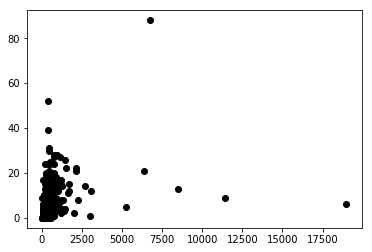

In [42]:
plt.plot( plugin_evs_by_district['2019 Q3'],plugin_evs_by_district['Total public rapid charging devices'], 'o', color='black');

[[4.46650407e+02 6.17073171e+00]
 [1.89880000e+04 6.00000000e+00]
 [7.65100000e+03 2.72000000e+01]]


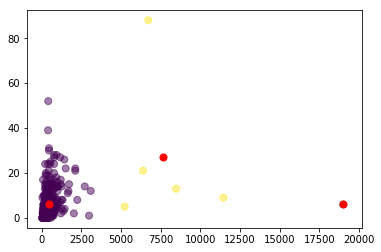

In [44]:
df = DataFrame(plugin_evs_by_district,columns=['2019 Q3','Total public rapid charging devices'])
  
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['2019 Q3'], df['Total public rapid charging devices'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

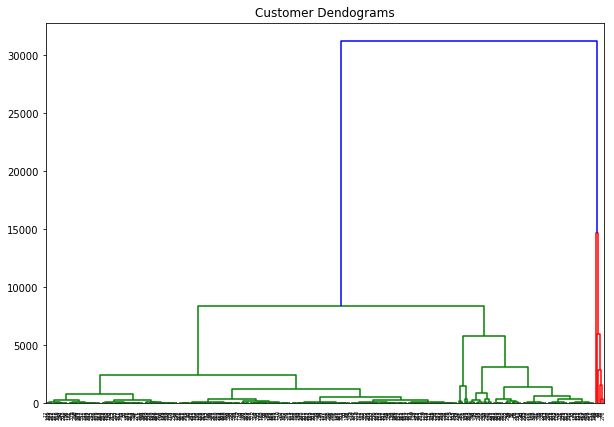

In [45]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [51]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0,
       0, 0, 0, 3, 3, 1, 4, 3, 3, 3, 0, 3, 0, 3, 1, 0, 0, 1, 3, 0, 3, 3,
       0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3,
       3, 3, 2, 3, 3, 3, 0, 3, 3, 0, 3, 0, 1, 3, 3, 3, 3, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,

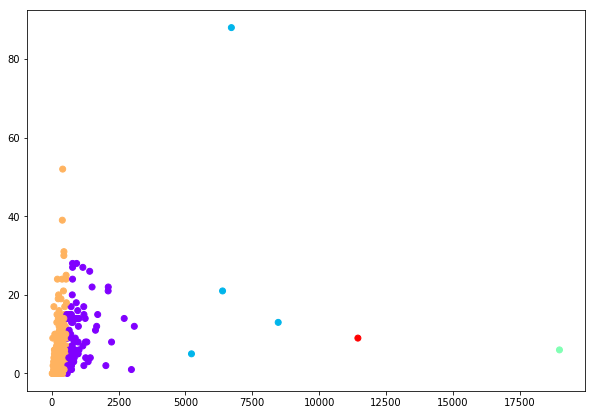

In [52]:
plt.figure(figsize=(10, 7))
plt.scatter(df['2019 Q3'], df['Total public rapid charging devices'], c=cluster.labels_, cmap='rainbow')

(array([181.,  96.,  33.,  34.,  11.,   6.,   5.,   3.,   1.,   1.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([0.        , 0.01022727, 0.02045455, 0.03068182, 0.04090909,
        0.05113636, 0.06136364, 0.07159091, 0.08181818, 0.09204545,
        0.10227273, 0.1125    , 0.12272727, 0.13295455, 0.14318182,
        0.15340909, 0.16363636, 0.17386364, 0.18409091, 0.19431818,
        0.20454545, 0.21477273, 0.225     ]),
 <a list of 22 Patch objects>)

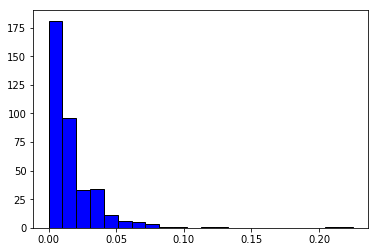

In [21]:
plt.hist(plugin_evs_by_district['ev_charger/vehicle_ratio'],color = 'blue', edgecolor = 'black',
         bins = int(180/8))

(array([332.,  30.,   4.,   3.,   0.,   0.,   1.,   2.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.80000000e+01, 8.80272727e+02, 1.74254545e+03, 2.60481818e+03,
        3.46709091e+03, 4.32936364e+03, 5.19163636e+03, 6.05390909e+03,
        6.91618182e+03, 7.77845455e+03, 8.64072727e+03, 9.50300000e+03,
        1.03652727e+04, 1.12275455e+04, 1.20898182e+04, 1.29520909e+04,
        1.38143636e+04, 1.46766364e+04, 1.55389091e+04, 1.64011818e+04,
        1.72634545e+04, 1.81257273e+04, 1.89880000e+04]),
 <a list of 22 Patch objects>)

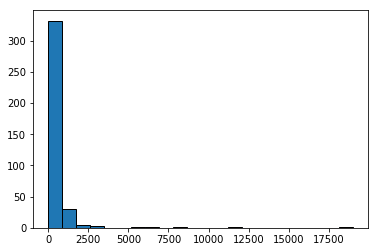

In [22]:
plt.hist(plugin_evs_by_district['2019 Q3'], edgecolor = 'black', bins = int(180/8))

(array([176., 109.,  40.,  12.,  10.,   9.,   4.,   4.,   4.,   1.,   1.,
          1.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([  0.        ,  22.04545455,  44.09090909,  66.13636364,
         88.18181818, 110.22727273, 132.27272727, 154.31818182,
        176.36363636, 198.40909091, 220.45454545, 242.5       ,
        264.54545455, 286.59090909, 308.63636364, 330.68181818,
        352.72727273, 374.77272727, 396.81818182, 418.86363636,
        440.90909091, 462.95454545, 485.        ]),
 <a list of 22 Patch objects>)

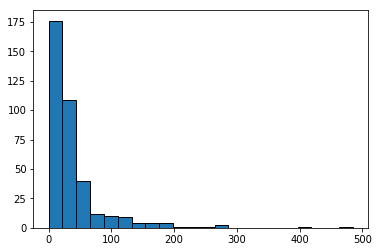

In [23]:
plt.hist(plugin_evs_by_district['Total public charging devices'],bins = int(180/8), edgecolor = 'black')

In [24]:
plugin_evs_by_district.sort_values('2019 Q3')

FID    LAD19CD             LAD19NM        LAD19NMW   BNG_E    BNG_N  \
49    50  E06000053     Isles of Scilly                   91327    11447   
369  377  W06000019       Blaenau Gwent   Blaenau Gwent  318236   206771   
374  382  W06000024      Merthyr Tydfil  Merthyr Tudful  305916   206424   
328  334  S12000013  Na h-Eileanan Siar                  126473   932862   
337  343  S12000027    Shetland Islands                  434516  1180307   
..   ...        ...                 ...             ...     ...      ...   
276  282  E08000035               Leeds                  432528   436384   
39    40  E06000042       Milton Keynes                  486408   242308   
36    37  E06000039              Slough                  498920   179246   
28    29  E06000031        Peterborough                  517372   300777   
266  272  E08000025          Birmingham                  408150   287352   

        LONG      LAT   Shape__Area  Shape__Length  ... 2013 Q4 2013 Q3  \
49  -6.30217  49.9233  3.631803e+07   6.677619e+04  ...     NaN     NaN   
369 -3.18592  51.7536  2.850425e+08   9.394895e+04  ...     NaN     NaN   
374 -3.36425  51.7486  2.955423e+08   9.558810e+04  ...     NaN     NaN   
328 -6.65722  58.1994  1.084072e+10   2.963747e+06  ...     NaN     NaN   
337 -1.37344  60.5050  5.905379e+09   2.361777e+06  ...     NaN     NaN   
..       ...      ...           ...            ...  ...     ...     ...   
276 -1.50736  53.8227  1.578276e+09   2.264610e+05  ...    72.0    67.0   
39  -0.74070  52.0724  8.182941e+08   1.429961e+05  ...   183.0   160.0   
36  -0.57617  51.5035  8.304181e+07   5.941155e+04  ...   147.0   143.0   
28  -0.26874  52.5921  9.267171e+08   1.599057e+05  ...    54.0    49.0   
266 -1.88141  52.4840  7.248697e+08   1.457057e+05  ...   282.0   251.0   

    2013 Q2  2013 Q1  2012 Q4  2012 Q3 2012 Q2 2012 Q1  2011 Q4  \
49      NaN      NaN      NaN      NaN     NaN     NaN      NaN   
369     NaN      NaN      0.0      0.0     NaN     0.0      0.0   
374     NaN      0.0      0.0      0.0     0.0     0.0      0.0   
328     NaN      NaN      NaN      NaN     NaN     NaN      NaN   
337     NaN      NaN      NaN      NaN     NaN     NaN      NaN   
..      ...      ...      ...      ...     ...     ...      ...   
276    75.0     62.0     61.0     47.0    42.0    40.0     36.0   
39    166.0    168.0    157.0    145.0   121.0   122.0    117.0   
36    141.0    135.0    145.0    117.0   104.0    87.0     80.0   
28     23.0     19.0     18.0     18.0    16.0    13.0      9.0   
266   235.0    180.0    160.0    131.0   102.0    77.0     73.0   

     ev_charger/vehicle_ratio  
49                   0.000000  
369                  0.000000  
374                  0.000000  
328                  0.225000  
337                  0.039216  
..                        ...  
276                  0.003287  
39                   0.013097  
36                   0.001535  
28                   0.000786  
266                  0.000316  

[375 rows x 51 columns]

In [38]:
bins = list(plugin_evs_by_district['ev_charger/vehicle_ratio'].quantile([0.6,0.8,1]))
bpa_map_v2=folium.Map(location=[51.5085300, 0.1257400], zoom_start=5)
Cl1=folium.Choropleth(geo_data=district,
                  data=plugin_evs_by_district,
                  columns=['ONS code','ev_charger/vehicle_ratio'],
                  key_on='feature.properties.LAD19CD',
                      fill_color='Greens',
                  fill_opacity=0.7,
                  line_opacity=0.5,
                      text=plugin_evs_by_district['Region/Loal Authority'],
                  legend_name='ev_charger/vehicle_ratio',
                      name='ev_charger/vehicle_ratio',
)


bins2 = list(plugin_evs_by_district['Total public charging devices'].quantile([0,0.2,0.4,0.6,0.8,1]))

Cl2=folium.Choropleth(geo_data=district,
                  data=plugin_evs_by_district,
                  columns=['ONS code','Total public charging devices'],
                  key_on='feature.properties.LAD19CD',
                      fill_color='BuPu',
                  fill_opacity=0.7,
                  line_opacity=0.5,
                  legend_name='Charging Numbers',
                      name='Charging Numbers',
                      text=plugin_evs_by_district['LAD19NM']
)




bins3 = list(plugin_evs_by_district['2019 Q3'].quantile([0,0.2,0.4,0.6,0.8,1]))

Cl3=folium.Choropleth(geo_data=district,
                  data=plugin_evs_by_district,
                  columns=['ONS code','2019 Q3'],
                  key_on='feature.properties.LAD19CD',
                      fill_color='OrRd',
                  fill_opacity=0.7,
                  line_opacity=0.5,
                  legend_name='EV Numbers',
                      name='EV Numbers',
                      text=plugin_evs_by_district['LAD19NM']
)




In [35]:
plugin_evs_by_district['2019 Q3'].quantile([0, 0.25, 0.5, 0.75, 1])

0.00       18.0
0.25      201.0
0.50      317.0
0.75      564.0
1.00    18988.0
Name: 2019 Q3, dtype: float64

In [39]:
bpa_map_v2.add_child(Cl1).add_child(Cl2).add_child(Cl3)
bpa_map_v2.add_child(folium.map.LayerControl())

In [40]:
bpa_map_v2.save('bpa_map_v2.html')

In [33]:
#folium.LayerControl(collapsed=True).add_to(bpa_map_v2)
#bpa_map_v2.save('bpa_map_v2.html')
#https://github.com/python-visualization/folium/issues/375

def add_choropleth (mapobj, gdf, id_field, value_field, fill_color = 'YlOrRd', fill_opacity = 0.6, 
                    line_opacity = 0.2, num_classes = 5, classifier = 'Fisher_Jenks'):
    #Allow for 3 Pysal map classifiers to display data
    #Generate list of breakpoints using specified classification scheme. List of breakpoint will be input to choropleth function
    if classifier == 'Fisher_Jenks':
        threshold_scale=mapclassify.FisherJenks(gdf[value_field], k = num_classes).bins.tolist()
    if classifier == 'Equal_Interval':
        threshold_scale=mapclassify.EqualInterval(gdf[value_field], k = num_classes).bins.tolist()
    if classifier == 'Quantiles':
        threshold_scale=esda.mapclassify.Quantiles(gdf[value_field], k = num_classes).bins.tolist()
    
    #Convert the GeoDataFrame to WGS84 coordinate reference system
    gdf_wgs84 = gdf.to_crs({'init': 'epsg:4326'})
    
    #Call Folium choropleth function, specifying the geometry as a the WGS84 dataframe converted to GeoJSON, the data as 
    #the GeoDataFrame, the columns as the user-specified id field and and value field.
    #key_on field refers to the id field within the GeoJSON string
    mapobj.choropleth(geo_str = gdf_wgs84.to_json(), data = gdf,
                columns = [id_field, value_field], key_on = 'feature.properties.{}'.format(id_field),
                fill_color = fill_color, fill_opacity = fill_opacity, line_opacity = line_opacity,  
                threshold_scale = threshold_scale)
    return mapobj

#Update basemap with choropleth
ev_map=add_choropleth(bpa_map, evs_by_district_plugin, 'ONS code','ev_charger/vehicle_ratio')
